<a href="https://colab.research.google.com/github/jjmecca/325_Midterm/blob/main/Jake_Mecca_DiDA_325_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Voter Registration Data Analysis

## 0. Load Stuff

In [ ]:
#Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv") #Dataframe

##Introduction

* The **Purpose** of my project to analyze voter registration data among different states and months, in order to gather important information to identify crucial state and national trends.  
* The **Goal** of my project is to identify important trends and pinpoint the most effective months and states for voter registration campaigns/advertisements.
* This **Notebook** identitifies and breaks down critical voter registration trends by various factors. This includes month, year, state, and swing state status, all of which are key factors that could shape voter registration data.

In additon to this, in this project I try to answer the following research questions:

* How do new voter registrations differ between months?
* Is there a noticable difference in voter registration for compeitive/swing states and other states?



## 1. Data Processing (8 points)

In [ ]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


####The Columns and What They Mean
*   **Jurisdiction**: This is the state or district the voter registration is collected from.
*   **Year**: This is simply the year the voter registration is collected from. Only 2016 and 2020 are provided.
*   **Month**: This is simply the month of the specified year the voter registration is collected from. Only the first five months are provided.
*   **New registered voters**: This is the count of the new registered voters in the specified state/district during the specified month and year.

In [ ]:
voters.isnull().values.any() #Checked for any null values in the dataset

False

In [ ]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


####Renamed columns:

In [ ]:
voters=voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})

Unfortunately, this dataset is very limited. Only 11 states are included, only 2 presidential election years, and only the first 5 months of the year.

###Exploratory Data Analysis (20 points, as noted)

#####General new registered voters data collection

In [ ]:
voters.loc[voters['registered_voters']==voters['registered_voters'].max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration was in California, in February of 2020.

In [ ]:
avg_registration = voters['registered_voters'].mean()
avg_registration

48223.46226415094

The overall average voter registration is around 48,223.

#####Created a new dataframe called "high_voters" that only includes new registered voters data that were above average

In [ ]:
high_voters = voters.loc[voters['registered_voters']>avg_registration]
high_voters.reset_index(drop=True, inplace=True)

In [ ]:
high_voters.count() #Gets the total amount of times voter registration was above average

,0
NAME,36
Year,36
Month,36
registered_voters,36


In [ ]:
high_voters.groupby(['NAME']).count() #Prints how many times each state's voter registration was above average

,Year,Month,registered_voters
NAME,,,
Arizona,3,3,3
California,7,7,7
Florida,7,7,7
Georgia,1,1,1
Illinois,4,4,4
North Carolina,6,6,6
Texas,8,8,8


The voter registration was above average 36 times.
*   Arizona was above average during 3 months.
*   California was above average during 7 months.
*   Florida was above average during 7 months.
*   Georgia was above average during 1 month.
*   Illinois was above average during 4 months.
*   North Carolina was above average during 6 months.
*   Texas was above average during 8 months.


In [ ]:
voters.groupby(['NAME'])['registered_voters'].mean().sort_values(ascending=False).head(3)
#Gets the average voter registration per state, sorts them by descending, then only prints the top 3

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


California, Texas, and Florida had the highest average voter registration overall.

##Data Visualization (30 points, as marked)

#####Created a new dataframe with the total new registered voters for each state.

In [ ]:
total_registered = voters.groupby(['NAME'])['registered_voters'].sum().sort_values(ascending=True).reset_index()
#Sorted by descending to easily read the graph

###Barplot of Total New Registered Voters by State: Jan-May of 2016 & 2020
Barplot presenting the total new registered voters by state using the new "total_registered" dataframe. Colored based on the amount of registered voters. The darker it is, the higher the registered voters count, this is seen on the legend on the left.

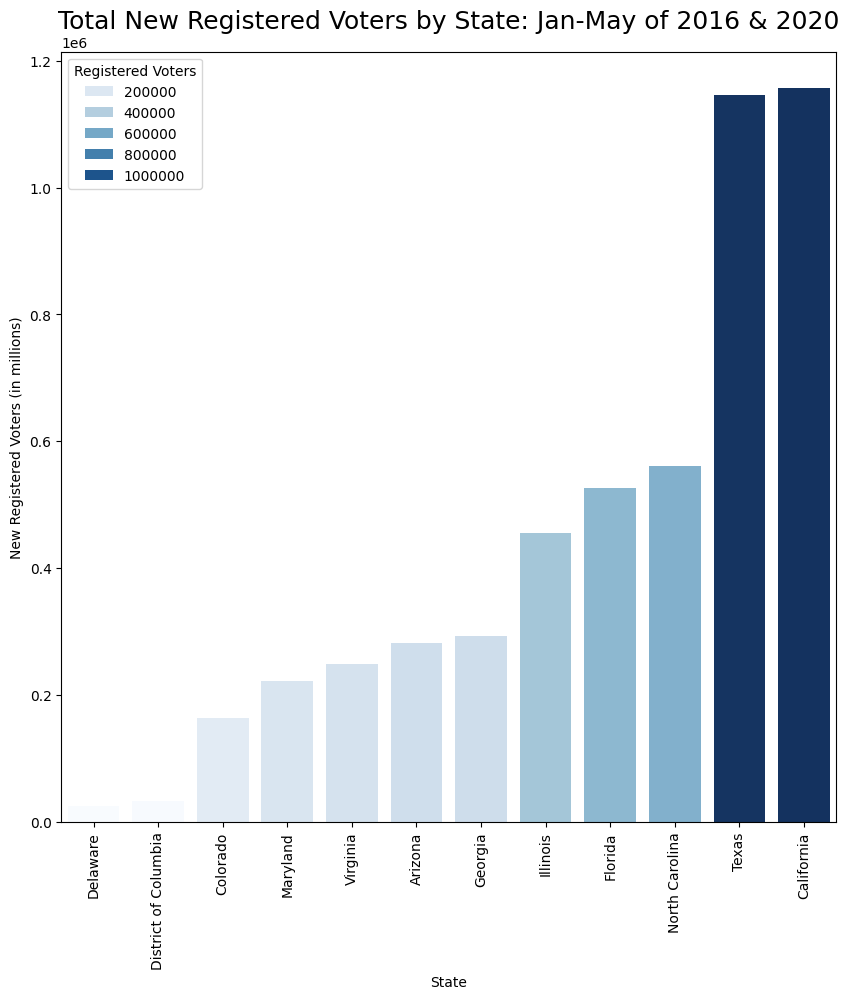

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(total_registered,x="NAME",y="registered_voters",palette='Blues',hue="registered_voters")
plt.xticks(fontsize=10,rotation=90)
plt.xlabel("State")
plt.ylabel("New Registered Voters (in Millions)")
plt.legend(title="Registered Voters")
plt.title("Total New Registered Voters by State: Jan-May of 2016 & 2020",fontsize=18)
plt.show()

Texas and California have significantly more total registered voters than every other state; Texas is just below California. This could simply be due to the large populations in these states.

In [ ]:
total_registered_month=voters.groupby(['Year','Month'])['registered_voters'].sum().reset_index()

In [ ]:
total_registered_month

,Year,Month,registered_voters
0,2016,Apr,675614
1,2016,Feb,704008
2,2016,Jan,473205
3,2016,Mar,742455
4,2016,May,158360
5,2020,Apr,200676
6,2020,Feb,797257
7,2020,Jan,666191
8,2020,Mar,601074
9,2020,May,92847


###Total New Registered Voters by Month Barplot
Barplot comparing voter registation in Jan-May of 2016 and 2020. This barplot is colored based on the month, and there is a legend indicating the color of each month on the right.

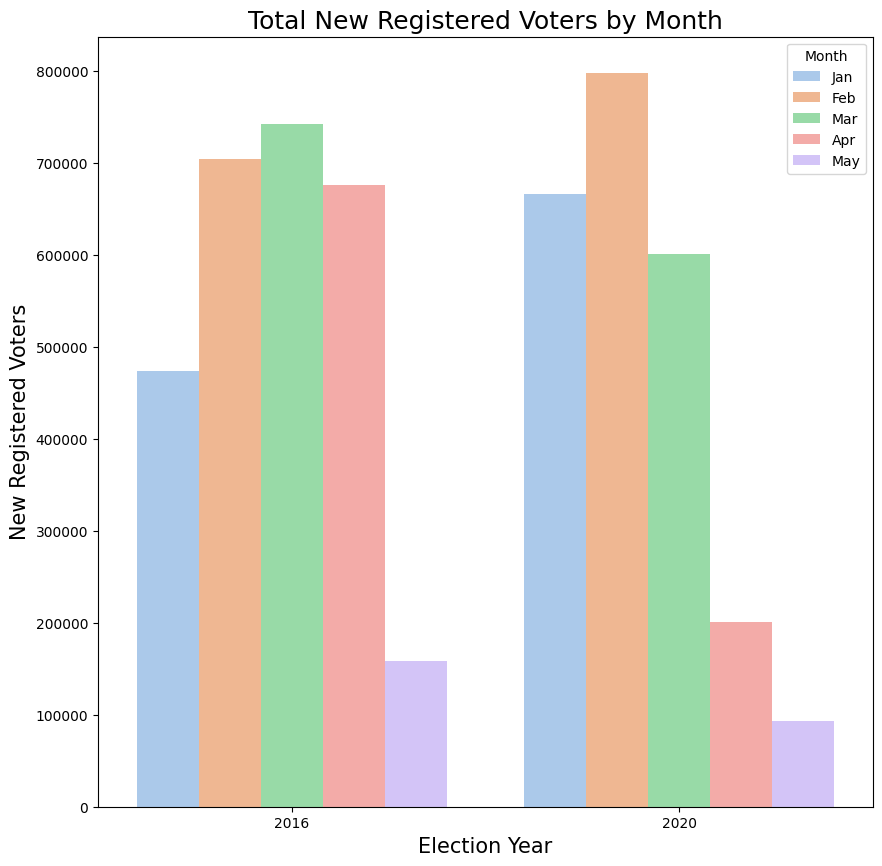

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(total_registered_month,y="registered_voters",x='Year',palette='pastel',hue="Month",hue_order=["Jan","Feb","Mar","Apr","May"])
plt.xlabel("Election Year",fontsize=15)
plt.ylabel("New Registered Voters",fontsize=15)
plt.legend(title="Month")
plt.title("Total New Registered Voters by Month",fontsize=18)
plt.show()

###Average New Registered Voters by Year Barplot
Barplot comparing average voter registation in Jan-May of 2016 and 2020. This barplot is colored based on whether or not the states are swing states, and there is a legend defining this on the right side.

In [ ]:
swing=["Arizona","Florida","Georgia","North Carolina","Texas"]

In [ ]:
voters['swing']=voters['NAME'].isin(swing)

In [ ]:
avg_state_type=voters.groupby(['Year','swing'])['registered_voters'].mean().reset_index()

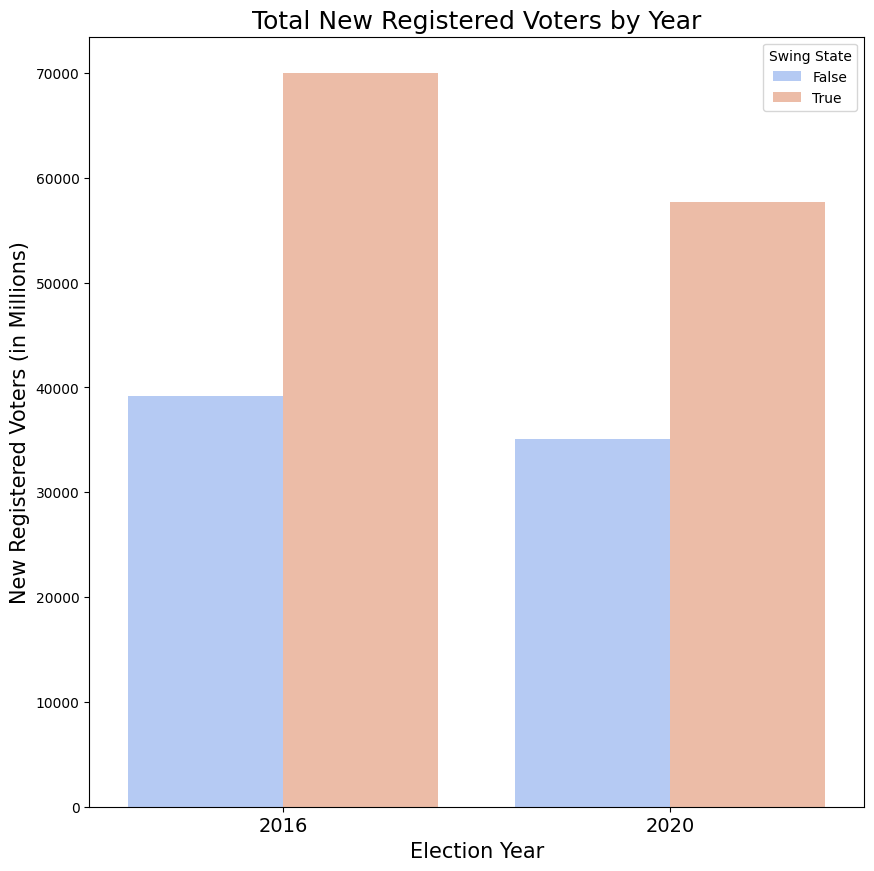

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=avg_state_type,y="registered_voters",x='Year',palette='coolwarm',hue="swing")
plt.xlabel("Election Year",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("New Registered Voters (in Millions)",fontsize=15)
plt.legend(title="Swing State")
plt.title("Total New Registered Voters by Year",fontsize=18)
plt.show()

##Mapping

#####Setup the basic US map

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

#####Created a new dataframe presenting the averages of registered voters by state

In [ ]:
avg_registration_state = voters.groupby(['NAME'])['registered_voters'].mean().reset_index()

In [ ]:
avg_registration_bbox = bbox.merge(avg_registration_state, on="NAME", how="inner")

###Average Voter Registration Map
Map of the US highlighting states based on their average voter registration in Jan-May of 2016 & 2020. This only includes the states we have the voter registration information for. Every other state is unlabeled and not highlighted.

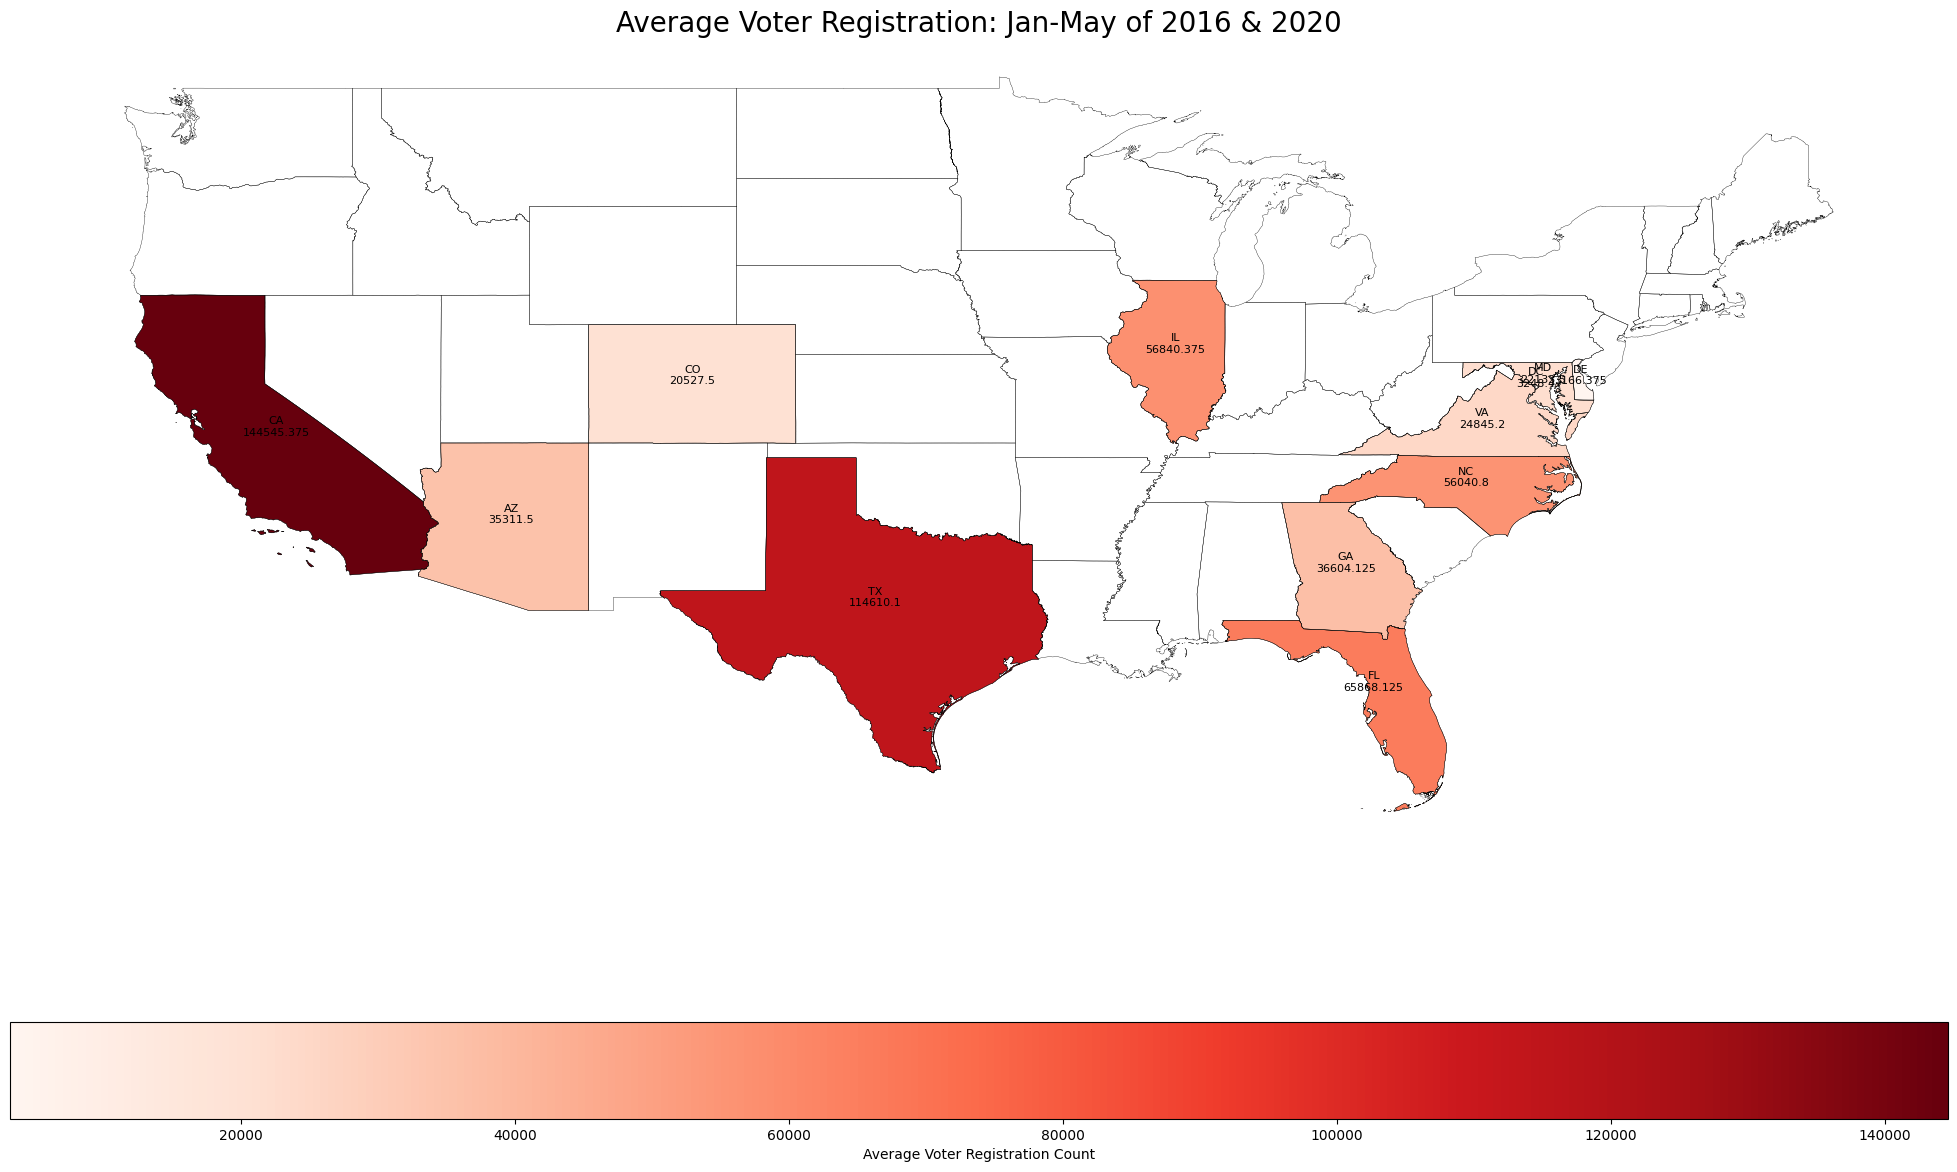

In [ ]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
plt.axis('off')
plt.title("Average Voter Registration: Jan-May of 2016 & 2020", fontsize=20)
bbox.boundary.plot(ax=ax, linewidth=0.25, edgecolor="black")
avg_registration_bbox.plot(ax=ax, legend=True, linewidth=0.25, edgecolor="black", cmap="Reds",column="registered_voters",
                           legend_kwds={"label":"Average Voter Registration Count","orientation" : "horizontal"})
avg_registration_bbox.apply(lambda x: ax.annotate(text=x.STUSPS+"\n"+str(x.registered_voters), xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=8),axis=1)
plt.show()

##Conclusion

####**Insights**
* February and March show peak voter registration, with February showing the overall highest.
* Texas and California have a significant higher voter registration. Although, they also have very high populations so that is likely a big factor in this number.
* There is a much higher voter registration average in swing states. Though, it's difficult to come to a definite conclusion about the higher voter registration average in swing states without taking the populations into account.

####**Suggestions**
* It may be good to for voter registrations campaigns to advertise in January or early February due to the high voter registration in February/March.
* There is a much higher voter registration average in swing states. It may be beneficial to advertise/campaign more in other states to increase voter registration elsewhere.  

####**Possible Next Steps**
* If any additional data  is released it'd be important to investigate and analyze that data to find any more possible trends. This dataset is VERY limited, so if more data about other states and months becomes available, it could provide us with a lot of insight.
* It may also be interesting to come back and revisit to this project when the 2024 election data comes out and update any graphs to see if the same trends remain.

##Github

[Link to the Github Repository](https://github.com/jjmecca/325_Midterm.git)

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

###X. Jake Mecca